In [29]:
import h5py
import os

from matplotlib.colors import hsv_to_rgb
from matplotlib_scalebar.scalebar import ScaleBar

import matplotlib.pyplot as plt
import numpy as np

In [30]:
file_loc = r'D:\User Data\Ralph\3DPFM_Test\PolyPZT'
base_filename = 'Image'
log_filename = 'Log_3DPFM'

In [31]:

os.chdir(file_loc)
with (h5py.File(base_filename+'.hf5', 'r')) as f:
    ux = f['3DPFM/ux'][:]
    uy = f['3DPFM/uy'][:]
    uz = f['3DPFM/uz'][:]
    
    priority = ['B', 'C', 'A', 'E']
    Cnt = next((x for x in priority if x in f.keys()), None)
    
    topo = f[Cnt+'/Channel_000/Channel_000/Channel_000'][:]
    scale = f[Cnt+'/Channel_000/Channel_000/original_metadata'].attrs['FastScanSize']/f[Cnt+'/Channel_000/Channel_000/original_metadata'].attrs['PointsLines']

U_mag = np.sqrt(np.abs(ux)**2+np.abs(uy)**2+np.abs(uz)**2)
U_mag_max = min(U_mag.max(), 3e-9)

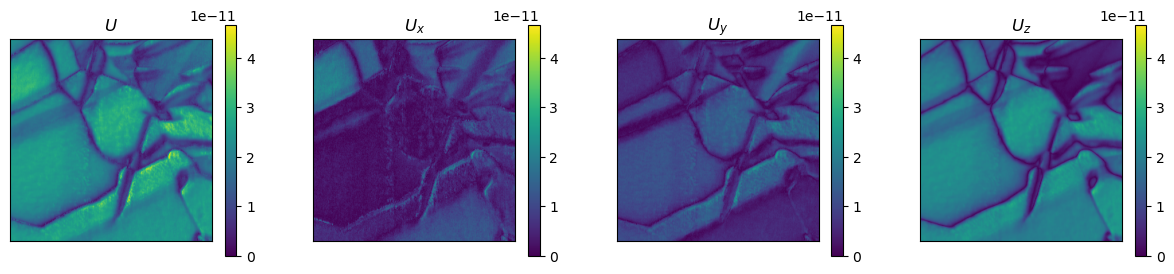

In [32]:
plt.figure(figsize = (15,3))
param = [U_mag, np.abs(ux), np.abs(uy), np.abs(uz)]
title = ['$U$', '$U_x$', '$U_y$', '$U_z$']
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title(title[i])
    plt.imshow(param[i], vmin = 0, vmax = U_mag_max)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
plt.savefig(base_filename+'_amplitude.png', dpi = 180)

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Asylum User\AppData\Local\Temp\ipykernel_15116\3075977014.py:3: SyntaxWarning: invalid escape sequence '\p'
  title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']
C:\Users\Asylum User\AppData\Local\Temp\ipykernel_15116\3075977014.py:3: SyntaxWarning: invalid escape sequence '\p'
  title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']
C:\Users\Asylum User\AppData\Local\Temp\ipykernel_15116\3075977014.py:3: SyntaxWarning: invalid escape sequence '\p'
  title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']


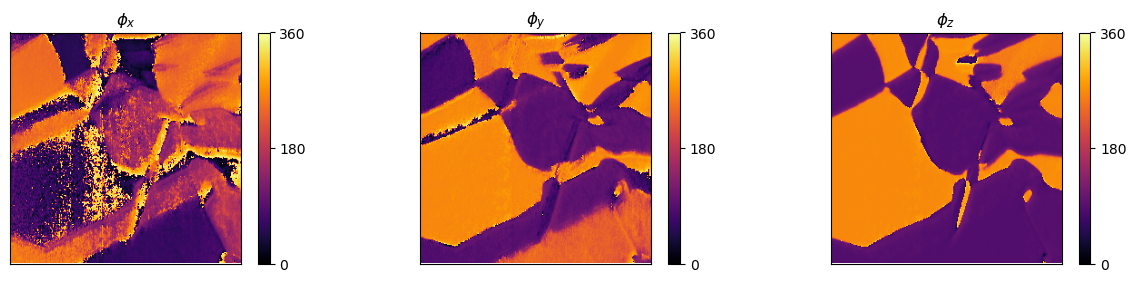

In [33]:
plt.figure(figsize = (15,3))
param = [(np.degrees(np.angle(ux))+90)%360, (np.degrees(np.angle(uy))+90)%360, (np.degrees(np.angle(uz))+90)%360]
title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(title[i])
    plt.imshow(param[i], cmap = 'inferno', vmin=0, vmax = 360)
    plt.colorbar(ticks = [0,180,360])
    plt.xticks([])
    plt.yticks([])
plt.savefig(base_filename+'_phase.png', dpi = 180)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


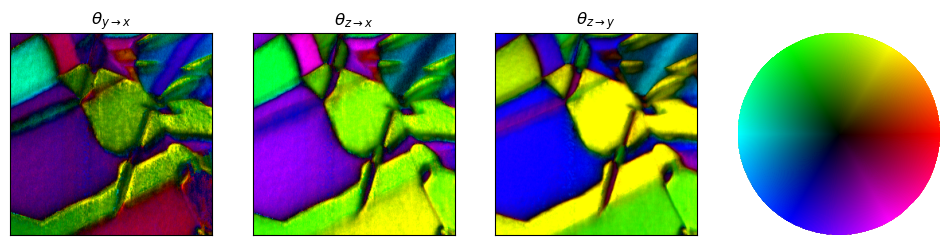

In [34]:
mag = np.sqrt(np.abs(ux)**2+np.abs(uy)**2+np.abs(uz)**2)

fig = plt.figure(figsize = (12,3))
pairs = [[uy, ux],[uz, ux],[uz, uy]]
pair_name = [r'$\theta_{y \to x}$', r'$\theta_{z \to x}$', r'$\theta_{z \to y}$']

for i, pair in enumerate(pairs):
    plt.subplot(1,4,i+1)
    # Compute angle (hue) and magnitude (brightness)
    angle = np.arctan2(np.real(pair[0]), np.real(pair[1]))   # radians
    magnitude = np.sqrt(np.abs(pair[0])**2 + np.abs(pair[1])**2)

    # Normalize hue [0,1] and magnitude [0,1]
    H = (np.degrees(angle) % 360) / 360.0
    S = np.ones_like(H)  # keep full saturation
    V = (2*magnitude) / U_mag_max

    # Stack into HSV and convert to RGB
    HSV = np.stack((H, S, V), axis=-1)
    RGB = hsv_to_rgb(HSV)

    # Show image
    plt.imshow(RGB)
    plt.xticks([])
    plt.yticks([])
    plt.title(pair_name[i])
    

# Create polar coordinates
n = 500
theta = np.linspace(0, 2 * np.pi, n)   # angle
r = np.linspace(0, 1, n)               # magnitude normalized

# Create a meshgrid for polar plot
Theta, R = np.meshgrid(theta, r)

# Map angle to hue (0–1 normalized from theta)
H = Theta / (2 * np.pi)

# Map radius to brightness (value channel in HSV)
S = np.ones_like(R)    # full saturation
V = R                  # brightness proportional to magnitude

# Combine HSV -> RGB
HSV = np.stack((H, S, V), axis=-1)
RGB = hsv_to_rgb(HSV)

# Plot in polar coordinates
ax = fig.add_subplot(1, 4, 4, polar=True)
ax.set_axis_off()  # hide grid/axes

# Use pcolormesh to draw colour field
ax.pcolormesh(Theta, R, V, color=RGB.reshape(-1,3), shading='auto')

plt.savefig(base_filename+'_polar-angle.png', dpi = 180)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


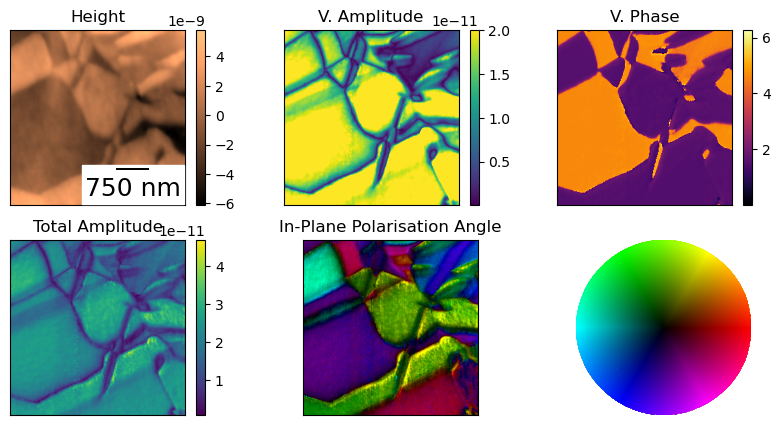

In [35]:
mag = np.sqrt(np.abs(ux)**2+np.abs(uy)**2+np.abs(uz)**2)

fig = plt.figure(figsize = (10,5))
plt.subplot(2,3,1)
plt.title('Height')
plt.imshow(topo, cmap = 'copper', vmin = np.min(topo), vmax = np.max(topo))
plt.xticks([])
plt.yticks([])
plt.colorbar()
scalebar = ScaleBar(scale, 'm', location = 'lower right', font_properties={'size':18})
plt.gca().add_artist(scalebar)
plt.subplot(2,3,2)
plt.title('V. Amplitude')
plt.imshow(np.abs(uz), vmax = 2e-11)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(2,3,3)
plt.title('V. Phase')
plt.imshow((np.angle(uz)+np.pi/2)%(2*np.pi), cmap = 'inferno')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(2,3,4)
plt.title('Total Amplitude')
plt.imshow(U_mag, vmax = U_mag_max)#, #alpha = np.sqrt(np.abs(ux)**2+np.abs(uy)**2)/mag)
plt.xticks([])
plt.yticks([])
plt.colorbar()

plt.subplot(2,3,5)
plt.title('In-Plane Polarisation Angle')

# Compute angle (hue) and magnitude (brightness)
angle = np.arctan2(np.real(uy), np.real(ux))   # radians
magnitude = np.sqrt(np.abs(uy)**2 + np.abs(ux)**2)

# Normalize hue [0,1] and magnitude [0,1]
H = (np.degrees(angle) % 360) / 360.0
S = np.ones_like(H)  # keep full saturation
V = (2*magnitude) / U_mag_max

# Stack into HSV and convert to RGB
HSV = np.stack((H, S, V), axis=-1)
RGB = hsv_to_rgb(HSV)

# Show image
plt.imshow(RGB)#, extent=[x.min(), x.max(), y.min(), y.max()])
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# Create polar coordinates
n = 500
theta = np.linspace(0, 2 * np.pi, n)   # angle
r = np.linspace(0, 1, n)               # magnitude normalized

# Create a meshgrid for polar plot
Theta, R = np.meshgrid(theta, r)

# Map angle to hue (0–1 normalized from theta)
H = Theta / (2 * np.pi)

# Map radius to brightness (value channel in HSV)
S = np.ones_like(R)    # full saturation
V = R                  # brightness proportional to magnitude

# Combine HSV -> RGB
HSV = np.stack((H, S, V), axis=-1)
RGB = hsv_to_rgb(HSV)

ax = fig.add_subplot(2, 3, 6, polar=True)
ax.set_axis_off()  # hide grid/axes

# Use pcolormesh to draw colour field
ax.pcolormesh(Theta, R, V, color=RGB.reshape(-1,3), shading='auto')

plt.savefig(base_filename+'_summary.png', dpi = 180)